# Comparison across mice strains
c57 vs SWISS w father (1-18) vs SWISS without father (19-35)

In [2]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu

In [3]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
c57 = 'C57_MaleUrine_Exposure_cFos'
swiss = 'SWISS_MaleUrine_Exposure'
subjects = ace.list_subjects(root_directory)
data_directory_c57 = root_directory + experiment + '/' \
                + c57 + '/'
data_directory_swiss = root_directory + experiment + '/' \
                + swiss + '/'


In [4]:
subjects_c57 = [name for name in os.listdir(data_directory_c57) \
                if os.path.isdir(os.path.join(data_directory_c57, name))]

In [5]:
subjects_swiss = [name for name in os.listdir(data_directory_swiss) \
                if os.path.isdir(os.path.join(data_directory_swiss, name))]

In [6]:
subjects_swiss_with_father = [sub for sub in subjects_swiss if sub[0:2]=='SW' and int(sub[2:].split('_')[0]) in set(range(2,19))]


In [7]:
subjects_swiss_without_father = [sub for sub in subjects_swiss if sub[0:2]=='SW' and int(sub[2:].split('_')[0]) in set(range(19,36))]

# Number of cells

In [10]:
df = {'ncells', 'group'}
df = pd.DataFrame(columns=['ncells', 'group'])
# load data c57 300
c57 = np.load('dict_results/dict_results_across_mice_c57.npy', allow_pickle=True).item()
n_cells_c57 = [c57[mouse]['n_cells'].sum() for mouse in c57.keys()]
df_c57 = pd.DataFrame(columns=['ncells', 'group'])
df_c57['ncells'] = n_cells_c57
df_c57['group'] = 'c57 (300) CP'
df = df.append(df_c57)
# # load data c57 700
# c57_700 = np.load('dict_results_across_mice_c57_700.npy', allow_pickle=True).item()
# n_cells_c57_700 = [c57_700[mouse]['n_cells'].sum() for mouse in c57_700.keys()]
# df_c57_700 = pd.DataFrame(columns=['ncells', 'group'])
# df_c57_700['ncells'] = n_cells_c57_700
# df_c57_700['group'] = 'c57 (700)'
# df = df.append(df_c57_700)
# # load data swiss 1-18
# swiss_without_father = np.load('dict_results_across_mice_SW1-18.npy', allow_pickle=True).item()
# n_cells_without_father = [swiss_without_father[mouse]['n_cells'].sum() for mouse in swiss_without_father.keys()]
# df_swiss_without_father = pd.DataFrame(columns=['ncells', 'group'])
# df_swiss_without_father['ncells'] = n_cells_without_father
# df_swiss_without_father['group'] = 'swiss_1-18 (100)'
# df = df.append(df_swiss_without_father)


# load data swiss 19-35 100
swiss_with_father = np.load('dict_results/dict_results_across_mice_SW19-35-150_7-7.npy', allow_pickle=True).item()
n_cells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
df_swiss_with_father['ncells'] = n_cells_with_father
df_swiss_with_father['group'] = 'swiss_19-35 (150 (7,7)) SP'
df = df.append(df_swiss_with_father)
# load data swiss 19-35 200
swiss_with_father = np.load('dict_results/dict_results_across_mice_SW19-35-150_10-10.npy', allow_pickle=True).item()
n_cells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
df_swiss_with_father['ncells'] = n_cells_with_father
df_swiss_with_father['group'] = 'swiss_19-35 (150 (10,10)) SP'
df = df.append(df_swiss_with_father)
# load data swiss 19-35 300
swiss_with_father = np.load('dict_results/dict_results_across_mice_SW19-35-200_7-7.npy', allow_pickle=True).item()
n_cells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
df_swiss_with_father['ncells'] = n_cells_with_father
df_swiss_with_father['group'] = 'swiss_19-35 (200 (7,7)) SP'
df = df.append(df_swiss_with_father)


# # load data new swiss 150
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SW_WF_1_24_2023.npy', allow_pickle=True).item()
# ncells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
# df_swiss_with_father['ncells'] = ncells_with_father
# df_swiss_with_father['group'] = 'swiss_WF_1_24_2023 (150) CP'
# df = df.append(df_swiss_with_father)
# # load data new swiss 200
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SW_WF_1_24_2023-200.npy', allow_pickle=True).item()
# ncells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
# df_swiss_with_father['ncells'] = ncells_with_father
# df_swiss_with_father['group'] = 'swiss_WF_1_24_2023 (200) CP'
# df = df.append(df_swiss_with_father)
# # load data new swiss 300
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SW_WF_1_24_2023-300.npy', allow_pickle=True).item()
# ncells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
# df_swiss_with_father['ncells'] = ncells_with_father
# df_swiss_with_father['group'] = 'swiss_WF_1_24_2023 (300) CP'
# df = df.append(df_swiss_with_father)


# # load data new swiss 700
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SWISS_2023_f_emSX-700.npy', allow_pickle=True).item()
# ncells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
# df_swiss_with_father['ncells'] = ncells_with_father
# df_swiss_with_father['group'] = 'SWISS_2023_f_emSX (700) SP'
# df = df.append(df_swiss_with_father)

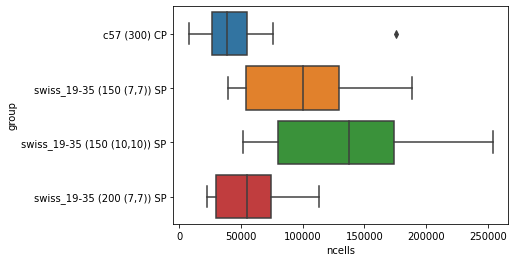

In [11]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="ncells", y="group", ax=ax)
fig.savefig('./figures/boxplot_ncells.png')

# Energia

In [12]:
df = {'energy', 'group'}
df = pd.DataFrame(columns=['energy','group'])
# load data c57 300
energy_c57 = [c57[mouse]['energy'].sum() for mouse in c57.keys()]
df_c57 = pd.DataFrame(columns=['energy', 'group'])
df_c57['energy'] = energy_c57
df_c57['group'] = 'c57 (300) CP'
df = df.append(df_c57)
# # load data c57 700
# energy_c57_700 = [c57_700[mouse]['energy'].sum() for mouse in c57_700.keys()]
# df_c57_700 = pd.DataFrame(columns=['energy', 'group'])
# df_c57_700['energy'] = energy_c57_700
# df_c57_700['group'] = 'c57 (700) CP'
# df = df.append(df_c57_700)
# # load data swiss 1-18
# energy_without_father = [swiss_without_father[mouse]['energy'].sum() for mouse in swiss_without_father.keys()]
# df_swiss_without_father = pd.DataFrame(columns=['energy', 'group'])
# df_swiss_without_father['energy'] = energy_without_father
# df_swiss_without_father['group'] = 'swiss_1-18 (100) CP'
# df = df.append(df_swiss_without_father)
# load data swiss 19-35 100
swiss_with_father = np.load('dict_results/dict_results_across_mice_SW19-35-150_7-7.npy', allow_pickle=True).item()
energy_with_father = [swiss_with_father[mouse]['energy'].sum() for mouse in swiss_with_father.keys()]
df_swiss_with_father = pd.DataFrame(columns=['energy', 'group'])
df_swiss_with_father['energy'] = energy_with_father
df_swiss_with_father['group'] = 'swiss_19-35 (150 (7,7)) SP'
df = df.append(df_swiss_with_father)
# load data swiss 19-35 200
swiss_with_father = np.load('dict_results/dict_results_across_mice_SW19-35-150_10-10.npy', allow_pickle=True).item()
energy_with_father = [swiss_with_father[mouse]['energy'].sum() for mouse in swiss_with_father.keys()]
df_swiss_with_father = pd.DataFrame(columns=['energy', 'group'])
df_swiss_with_father['energy'] = energy_with_father
df_swiss_with_father['group'] = 'swiss_19-35 (150 (10,10)) SP'
df = df.append(df_swiss_with_father)
# load data swiss 19-35 300
swiss_with_father = np.load('dict_results/dict_results_across_mice_SW19-35-200_7-7.npy', allow_pickle=True).item()
energy_with_father = [swiss_with_father[mouse]['energy'].sum() for mouse in swiss_with_father.keys()]
df_swiss_with_father = pd.DataFrame(columns=['energy', 'group'])
df_swiss_with_father['energy'] = energy_with_father
df_swiss_with_father['group'] = 'swiss_19-35 (200 (7,7)) SP'
df = df.append(df_swiss_with_father)
# # load data new swiss 150
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SW_WF_1_24_2023.npy', allow_pickle=True).item()
# energy_with_father = [swiss_with_father[mouse]['energy'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['energy', 'group'])
# df_swiss_with_father['energy'] = energy_with_father
# df_swiss_with_father['group'] = 'swiss_WF_1_24_2023 (150) CP'
# df = df.append(df_swiss_with_father)
# # load data new swiss 300
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SW_WF_1_24_2023-200.npy', allow_pickle=True).item()
# energy_with_father = [swiss_with_father[mouse]['energy'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['energy', 'group'])
# df_swiss_with_father['energy'] = energy_with_father
# df_swiss_with_father['group'] = 'swiss_WF_1_24_2023 (200) CP'
# df = df.append(df_swiss_with_father)
# # load data new swiss 300
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SW_WF_1_24_2023-300.npy', allow_pickle=True).item()
# energy_with_father = [swiss_with_father[mouse]['energy'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['energy', 'group'])
# df_swiss_with_father['energy'] = energy_with_father
# df_swiss_with_father['group'] = 'swiss_WF_1_24_2023 (300) CP'
# df = df.append(df_swiss_with_father)
# # load data new swiss 3700
# swiss_with_father = np.load('dict_results/dict_results_across_mice_SWISS_2023_f_emSX-700.npy', allow_pickle=True).item()
# ncells_with_father = [swiss_with_father[mouse]['energy'].sum() for mouse in swiss_with_father.keys()]
# df_swiss_with_father = pd.DataFrame(columns=['energy', 'group'])
# df_swiss_with_father['energy'] = ncells_with_father
# df_swiss_with_father['group'] = 'SWISS_2023_f_emSX (700) SP'
# df = df.append(df_swiss_with_father)

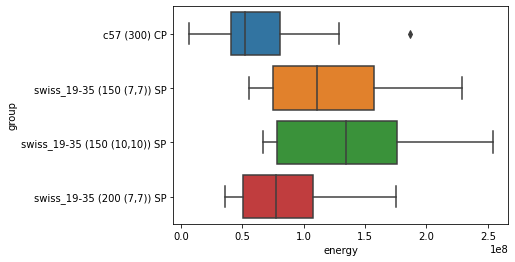

In [13]:
fig, ax = plt.subplots()
sns.boxplot(data=df, x="energy", y="group")
fig.savefig('./figures/boxplot_energy.png')

# TODO: fare gruppo per gruppo
- check & identify outliers

- supramammillary attivato in CP unfamiliar
- supramammillary attivato in SP both

# Group by group

In [11]:
df = {'ncells', 'group'}
df = pd.DataFrame(columns=['ncells', 'group'])
# load data new swiss 300
swiss_with_father = np.load('dict_results_across_mice_SW_WF_1_24_2023-300.npy', allow_pickle=True).item()
ncells_with_father = [swiss_with_father[mouse]['n_cells'].sum() for mouse in swiss_with_father.keys()]
df_swiss_with_father = pd.DataFrame(columns=['ncells', 'group'])
df_swiss_with_father['ncells'] = ncells_with_father
df_swiss_with_father['group'] = re.split(r'(\d+)', string)[-1]
df = df.append(df_swiss_with_father)

NameError: name 're' is not defined